# 1. 데이터 기본

## 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 2. 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy 라이브러리를 로드합니다.
# 시각화를 위한 seaborn, matplotlib.pyplot 라이브러리를 로드합니다.
# 구버전 jupyter notebook에서 시각화를 보기 위해서는 %matplotlib inline을 지정해야 합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 3. 데이터셋 로드

In [2]:
# 데이터와 jupyter notebook이 같은 경로에 있어야 관리하기에 편리합니다.
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

* diabetes 데이터셋은 768개의 행과 9개의 열로 구성되어 있습니다.
* Outcome 이 우리가 예측해야 하는 데이터입니다.
* 데이터가 모두 숫자이기 때문에 전처리가 필요하지 않습니다.

# 4. 학습, 예측 데이터셋 나누기

In [4]:
# df.shape는 튜플로 데이터를 가져오고, [0]이라는 인덱싱을 하면 앞자리인 df의 행의 갯수를 출력합니다.
# 8:2의 비율로 구하기 위해 여기서 나온 행의 갯수의 80%만 가져오는 연산을 하여 int() 함수를 이용해 정수로 떨어지게 합니다.
# split_count 변수에 담아주고, 가장 마지막 줄을 출력하기 위해 split_count를 입력합니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [5]:
# ':(콜론)'으로 슬라이싱이 가능합니다.
# 0번째 행부터 split_count번째 전까지 슬라이싱 한 행들을 .copy()로 복사하여 train에 넣습니다.
train = df[:split_count].copy()
train.shape

(614, 9)

In [6]:
# split_count부터 끝 행까지 슬라이싱합니다.
test = df[split_count:].copy()
train.shape

(614, 9)

# 5. 학습, 예측에 사용할 컬럼

In [7]:
# 학습과 예측에 사용할 컬럼명(처음부터 마지막에서 두번째 열까지)을 feature_names로 지정합니다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 6. 정답값이자 예측해야 될 값(컬럼)

In [8]:
# 예측할 컬럼(Outcome)을 label_name로 지정합니다.
# 1개이기 때문에 string 형태로 지정합니다.
label_name = train.columns[-1]
label_name

'Outcome'

# 7. 학습, 예측 데이터셋 만들기

In [9]:
# 학습 세트를 만들어 줍니다.
# feature_names 변수에 들어있는 열만 가져옵니다.
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [10]:
# 정답 값을 만들어 줍니다.
# Outcome 하나만 train에서 가져옵니다.
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
# 예측에 사용할 데이터셋을 만듭니다. X_train의 열 개수가 같아야 합니다.
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50

In [12]:
# 예측의 정답 값을 만듭니다. 학습이 잘 되었는지 확인하기 위해서 만듭니다.
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 8. 머신러닝 알고리즘 가져오기

In [13]:
# 분류 문제를 풀어봅니다. 만약 당뇨병 수치를 예측하고자 한다면 회귀 문제를 풀어야 합니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 9. 학습(훈련)

In [14]:
# 기출문제(X_train)와 정답(y_train)을 이용해 공부하는 과정과 유사합니다.
# shift+tab키나 '?'를 활용하여 사용법을 알 수 있습니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 10. 예측

In [16]:
# 정답열을 넣지 않고, 풀어야 할 문제열만 넣어줍니다.
# 실전 시험문제(X_train)와 같습니다. 정답을 직접 예측합니다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

Accuracy  80.72916666666666


/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


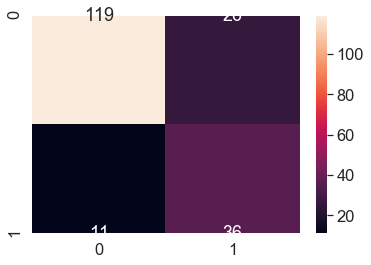

In [9]:
from sklearn.linear_model import LogisticRegression

#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

Accuracy  72.91666666666666


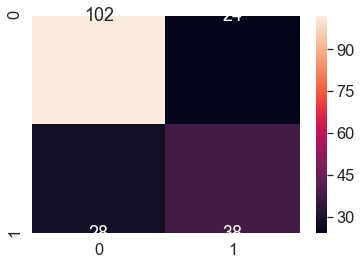

In [6]:
from sklearn.tree import DecisionTreeClassifier
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

Accuracy  73.4375


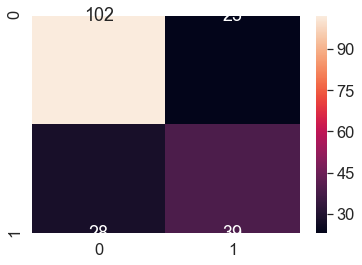

In [7]:
from sklearn.tree import DecisionTreeClassifier

#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

Accuracy  81.25


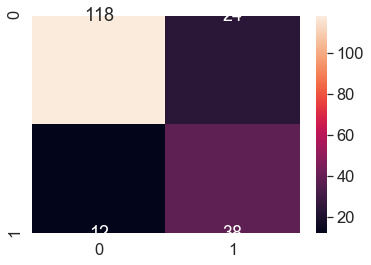

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')

* 참고 : https://www.kaggle.com/rishpande/pima-indians-diabetes-beginner